# Obesity Prediction Using Classification Models and PCA

## Loading Libraries, Data and Explaining the Variables
Loading libraries, importing the dataset, and providing a brief explanation of the variables are the essential first steps in data analysis, ensuring that the necessary tools and data are ready for exploration and understanding.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and view the first 5 rows
data = pd.read_csv('/kaggle/input/obesity-prediction/Obesity prediction.csv')
data.head(5)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Why Should We Explore the Dataset?
Before jumping into classification and PCA, it is crucial to explore the dataset. Understanding the structure, patterns, and potential issues in the data helps in making informed decisions for preprocessing and modeling. Skipping this step could lead to poor model performance or misleading results. Below is a detailed explanation of the steps to explore the dataset effectively:

### **View Basic Information:**
Understanding the structure of the dataset is the first step.

In [3]:
# Check dataset dimensions
print(f"Dataset Shape: {data.shape}")

# Get column types and null count
print(data.info())

Dataset Shape: (2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: floa

### **Check for Missing Values:**
Missing data can skew results, so it is important to identify and handle them.

In [4]:
# Check for missing values
print("Missing Values per Column:")
print(data.isnull().sum())

Missing Values per Column:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


### Statistical Summary:
This helps us to understand the distribution (mean, min, max) of numerical variables and identify any outliers or inconsistencies.

In [5]:
# Statistical summary of numerical features
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

### Analyze Class Distributions:
Examining the target variable (Obesity) and other categorical columns to check for imbalanced classes. If the target variable or other categorical features have imbalanced classes, this can affect model performance. Techniques like resampling or weighted metrics may be needed.

In [6]:
# Distribution of the target variable
print("Obesity Class Distribution:")
print(data['Obesity'].value_counts())

# Check distributions of other categorical columns
categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for col in categorical_cols:
    print(f"{col} Distribution:")
    print(data[col].value_counts())
    print()

Obesity Class Distribution:
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
Gender Distribution:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history Distribution:
family_history
yes    1726
no      385
Name: count, dtype: int64

FAVC Distribution:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC Distribution:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE Distribution:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC Distribution:
SCC
no     2015
yes      96
Name: count, dtype: int64

CALC Distribution:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS Distribution:
MTRANS
Public_Transportation    1580
Automobile                457
Wa

### Visualize Distributions:
Using histogram to visualize the distribution of numerical features and boxplot to detect outliers in numerical data. This helps us to identify patterns, such as skewness or the presence of extreme values (outliers), which could impact models.

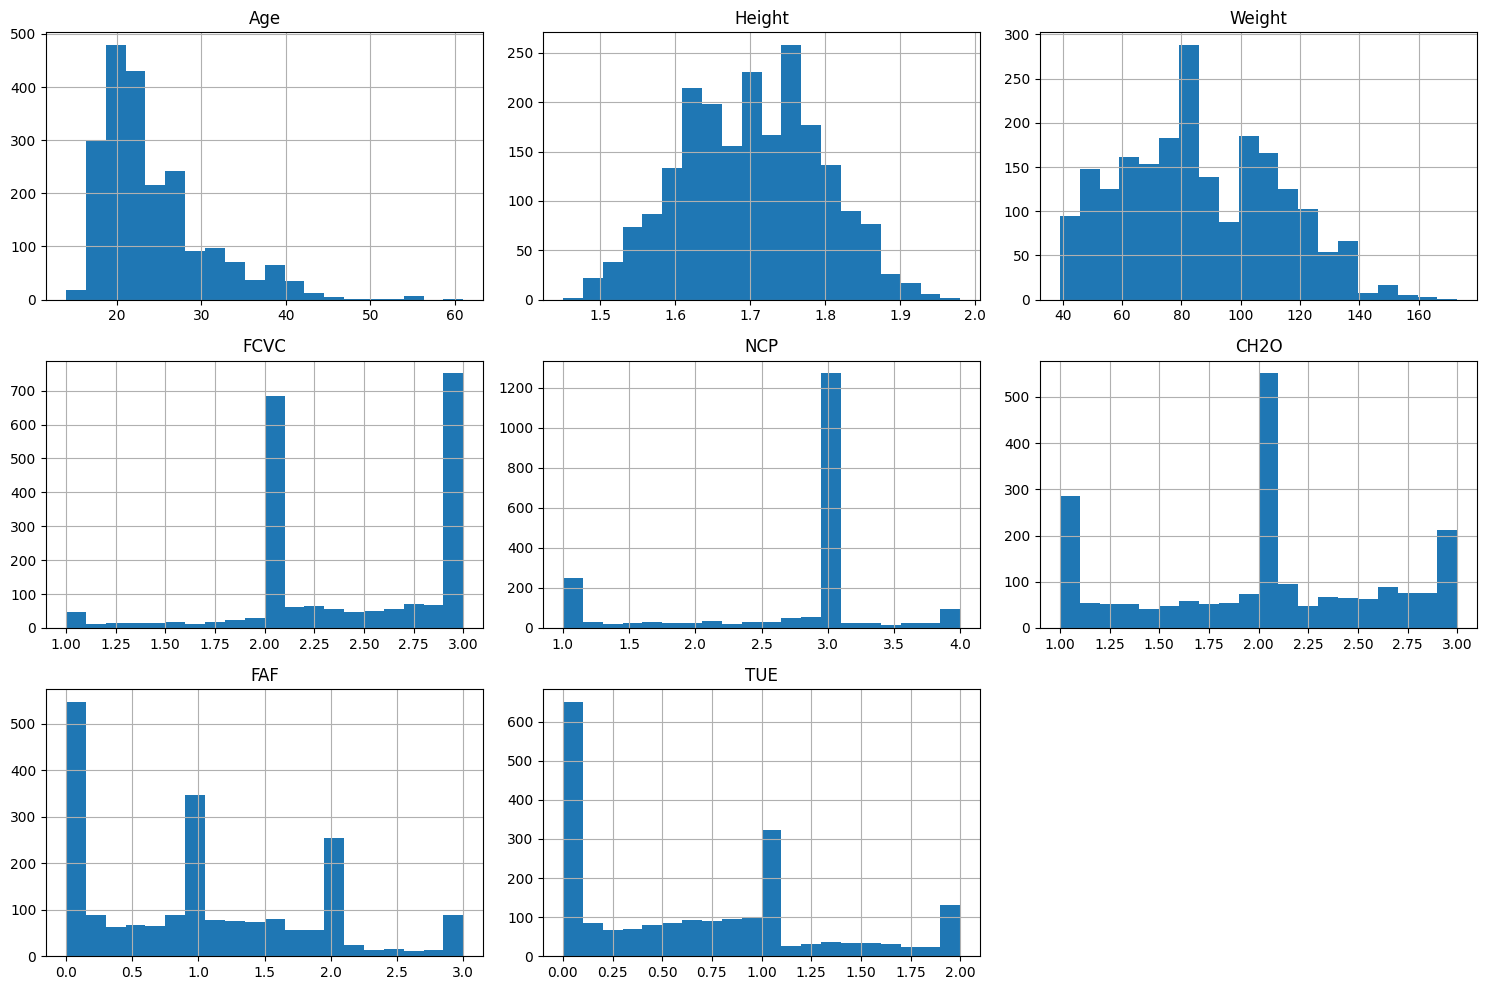

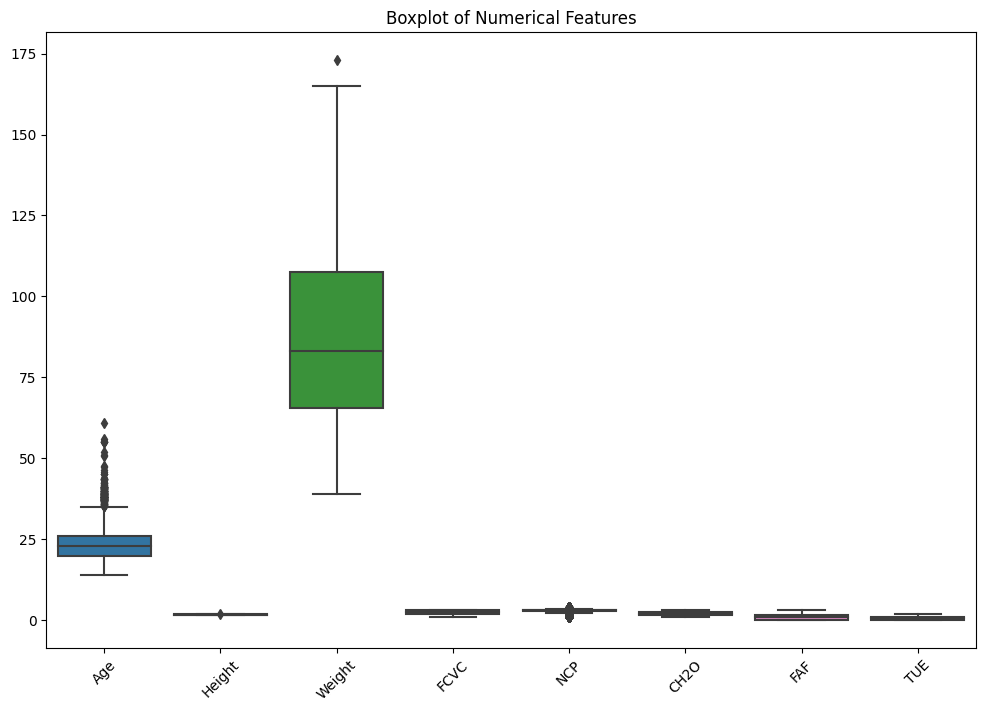

In [7]:
# Histograms for numerical features
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot to detect outliers
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


### Correlation Analysis:
Computing a correlation matrix to identify relationships between numerical features. Features that are highly correlated (positive or negative) might be redundant and could be removed or reduced using techniques like PCA.

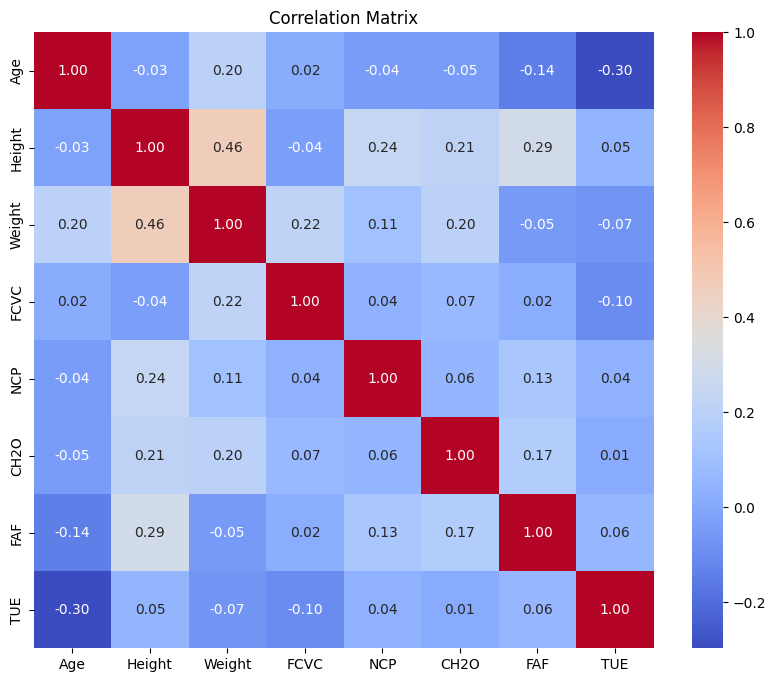

In [8]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns

# Compute correlation matrix for numerical columns
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Analyze Relationships Between Features and the Target:
Exploring the relationship between categorical features and the target variable using count plots. Understanding how different levels of categorical features relate to obesity levels helps in feature selection and understanding the data better.

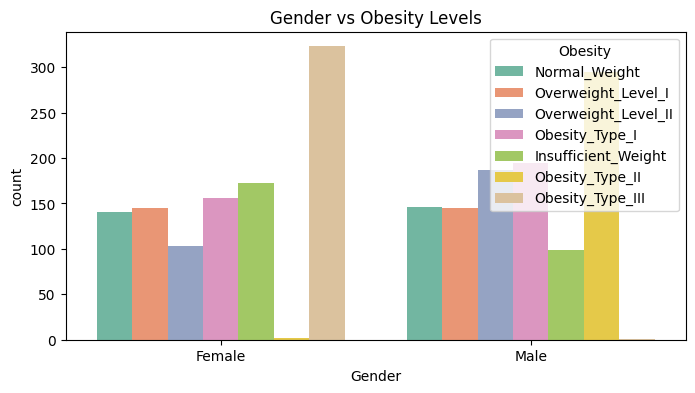

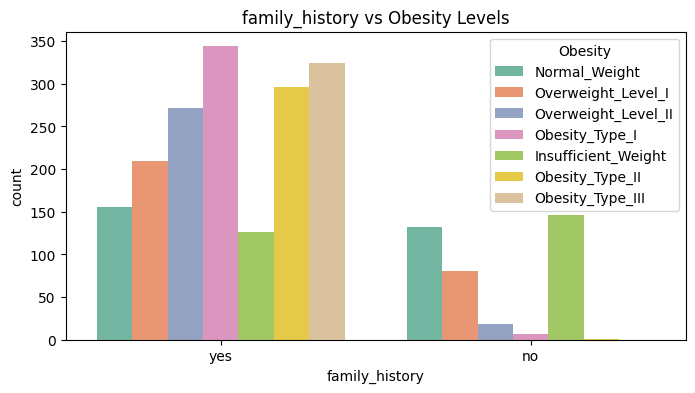

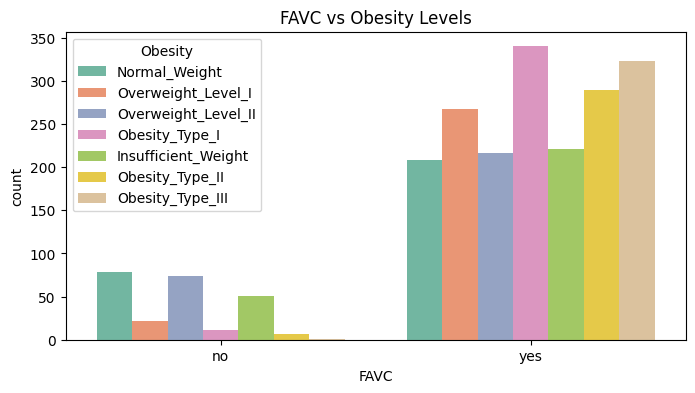

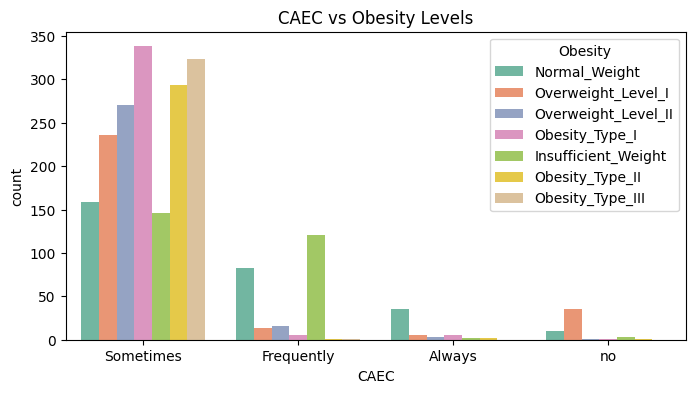

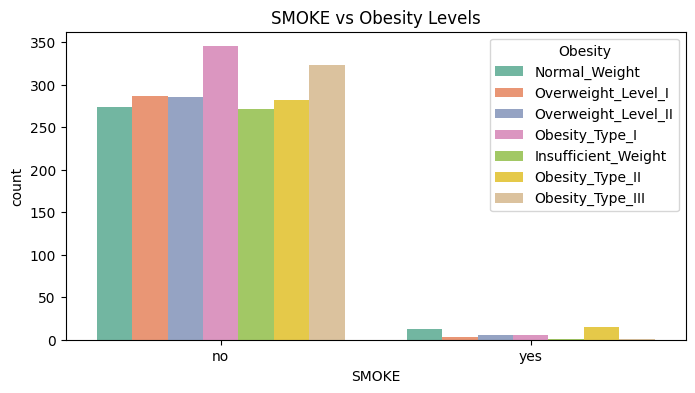

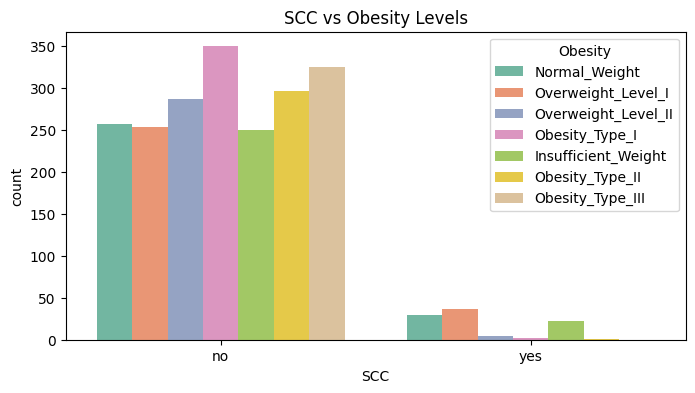

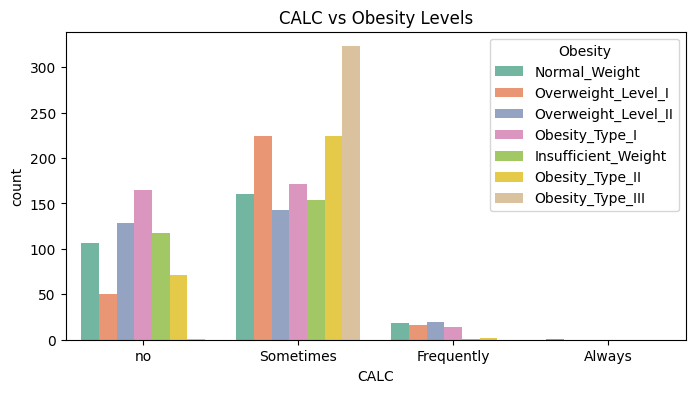

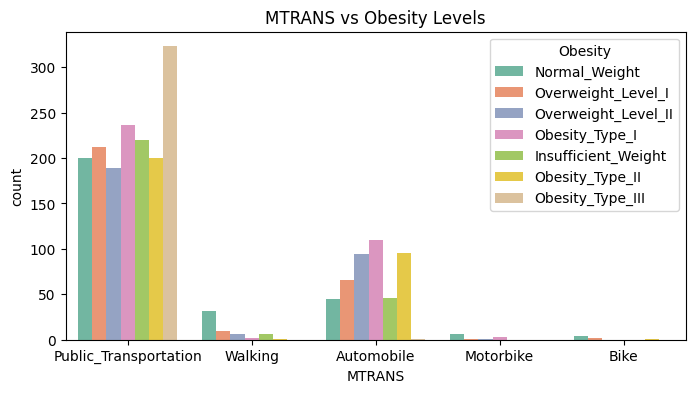

In [9]:
# Count plots for categorical features vs target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue="Obesity", data=data, palette="Set2")
    plt.title(f"{col} vs Obesity Levels")
    plt.legend(title="Obesity")
    plt.show()

## Preprocessing the Data
### Endoding Categorical Features

In [10]:
label_encoders = {}

# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()  # Create a new instance for each column
    data[col] = label_encoders[col].fit_transform(data[col])
print("Label Encoded Data:")
print(data.head(3))

Label Encoded Data:
   Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0     2      0   
1       0  21.0    1.52    56.0               1     0   3.0  3.0     2      1   
2       1  23.0    1.80    77.0               1     0   2.0  3.0     2      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  Obesity  
0   2.0    0  0.0  1.0     3       3        1  
1   3.0    1  3.0  0.0     2       3        1  
2   2.0    0  2.0  1.0     1       3        1  


In [11]:
X = data.drop(columns=['Obesity'])  # remove the target variable
y = data['Obesity']
X.head(3)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3


### Splitting Data into Train and Test Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Splitting Features and Target and Standardizing the Data

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Classification with Three Algorithms
For each algorithm, the training process is applied, predictions are made, and the performance is evaluated using the classification report.
### Random Forest:

In [14]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"RF Accuracy: {accuracy}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

RF Accuracy: 0.9527186761229315

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.86      0.90      0.88        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.98      0.98      0.98        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### Logistic Regression:

In [15]:
lreg = LogisticRegression(max_iter=1000, random_state=42)
lreg.fit(X_train_scaled, y_train)
y_pred_lreg = lreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lreg)

print(f"LR Accuracy: {accuracy}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lreg))

LR Accuracy: 0.8747044917257684

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



### K-Nearest Neighbors:

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8203309692671394

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.67      0.45      0.54        62
           2       0.84      0.92      0.88        78
           3       0.92      0.98      0.95        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68      0.75        56
           6       0.73      0.76      0.75        50

    accuracy                           0.82       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



## Applying PCA

### Reducing to 2 Components


In [17]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
# Fitting Random Forest to the training set
rf_pca = RandomForestClassifier(n_estimators = 100)
rf_pca.fit(X_train_scaled, y_train)

# Predicting the test set result 
y_pred_rf_pca = rf_pca.predict(X_test_scaled)

accuracy_rf_pca = accuracy_score(y_pred_rf_pca , y_test)
print(f"RF PCA Accuracy: {accuracy_rf_pca}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_pred_rf_pca, y_test))

RF PCA Accuracy: 0.9527186761229315

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.92      0.86      0.89        66
           2       0.97      0.99      0.98        77
           3       0.98      0.97      0.97        59
           4       1.00      1.00      1.00        63
           5       0.86      0.89      0.87        54
           6       0.96      0.98      0.97        49

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

